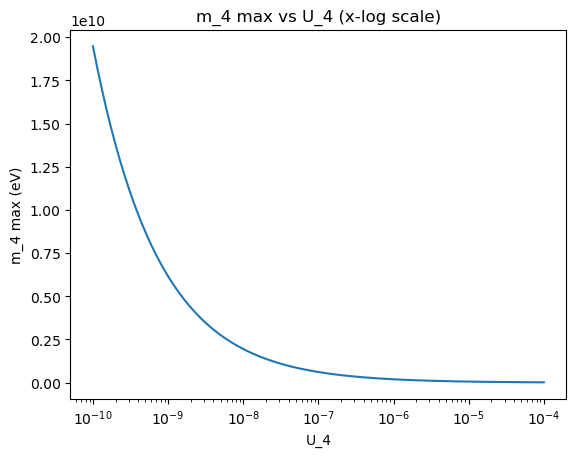

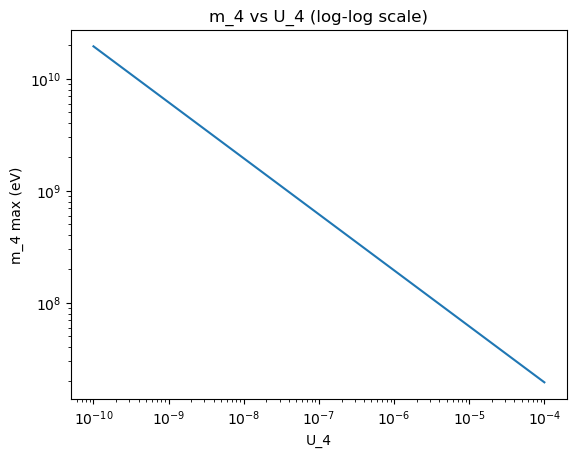

411529.8243830418


In [1]:
import numpy as np

def solve_m4_positive_real_array(u4, var):
    """
    Vectorized solution for the positive real solution of m_4 given arrays of u4 values.
    
    Parameters
    ----------
    u4 : array_like
        The mixing parameter U_4 (can be scalar or array).
    var : float
        The variance Var = Var(m_nu^2), scalar.
    
    Returns
    -------
    np.ndarray
        An array of the positive real solutions for m_4; entries with no valid real solution are NaN.
    """
    # Hardcoded constants
    d = 1.572626060168e-4
    C = 1.37625858290641e-7

    u4 = np.asarray(u4, dtype=float)

    # Coefficients for quadratic in y = m4^2
    A = u4**2 - u4**4
    B = -d * u4**2
    D = C - var

    # Discriminant
    disc = B**2 - 4 * A * D

    # Compute two roots for y
    sqrt_disc = np.sqrt(disc, where=disc>=0, out=np.full_like(disc, np.nan))
    y1 = (-B + sqrt_disc) / (2 * A)
    y2 = (-B - sqrt_disc) / (2 * A)

    # Candidate m4 from sqrt of positive, real y
    m4_1 = np.sqrt(y1, where=y1>=0, out=np.full_like(y1, np.nan))
    m4_2 = np.sqrt(y2, where=y2>=0, out=np.full_like(y2, np.nan))

    # Choose the positive solution if exists, else NaN
    # np.where will pick m4_1 if it's real positive, else m4_2 (if that is), else NaN
    m4 = np.where(~np.isnan(m4_1) & (m4_1 > 0), m4_1,
                  np.where(~np.isnan(m4_2) & (m4_2 > 0), m4_2, np.nan))
    
    return m4

# Example usage and plotting
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Define u4 values logarithmically spaced
    u4_vals = np.logspace(-10, -4, num=200)
    var_val = 1.437e21  # example variance

    # Compute m4 for each u4
    m4_vals = solve_m4_positive_real_array(u4_vals, var_val)

    # Plot
    plt.semilogx(u4_vals, m4_vals)
    plt.xlabel("U_4")
    plt.ylabel("m_4 max (eV)")
    plt.title("m_4 max vs U_4 (x-log scale)")
    plt.show()

    plt.loglog(u4_vals, m4_vals)
    plt.xlabel("U_4")
    plt.ylabel("m_4 max (eV)")
    plt.title("m_4 vs U_4 (log-log scale)")
    plt.show()

    print(solve_m4_positive_real_array(0.23, 1.437e21))


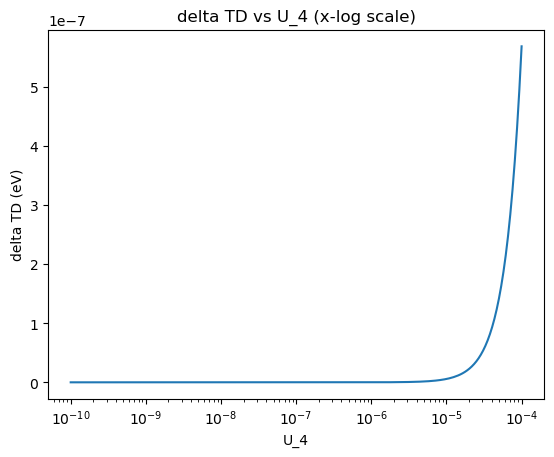

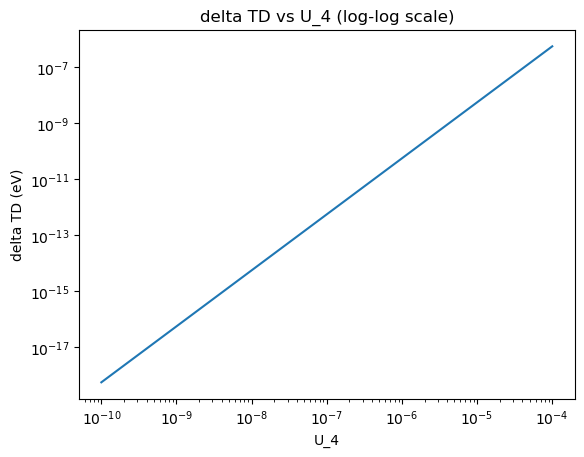

In [5]:
def solve_deltaTD(u4):
    TD = 56.8224
    
    u4 = np.asarray(u4, dtype=float)
    
    return TD * u4**2

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Define u4 values logarithmically spaced
    u4_vals = np.logspace(-10, -4, num=200)


    # Compute m4 for each u4
    delta_TD_vals = solve_deltaTD(u4_vals)

    # Plot
    plt.semilogx(u4_vals, delta_TD_vals)
    plt.xlabel("U_4")
    plt.ylabel("delta TD (eV)")
    plt.title("delta TD vs U_4 (x-log scale)")
    plt.show()
    plt.loglog(u4_vals, delta_TD_vals)
    plt.xlabel("U_4")
    plt.ylabel("delta TD (eV)")
    plt.title("delta TD vs U_4 (log-log scale)")
    plt.show()

C:\Users\Edward\AppData\Local\Temp\ipykernel_13716\2395280542.py:12: RuntimeWarning: invalid value encountered in sqrt
  F = np.sqrt( (-A + D * B) ** 2 - (4 * A * RHS) )
C:\Users\Edward\AppData\Local\Temp\ipykernel_13716\2395280542.py:27: RuntimeWarning: invalid value encountered in sqrt
  F = np.sqrt( (-A + D * B) ** 2 - (4 * A * RHS) )


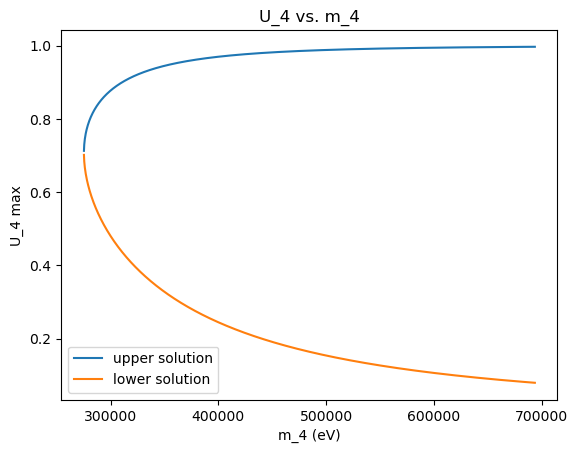

275346.26506291964


In [8]:
import numpy as np

def compute_U4_max1(m4_eV):
    # Constants
    A = m4_eV**4
    B = m4_eV**2
    RHS = 1.437e21
    C = 1.37625858290641e-7
    D = 1.572e-4

    E = -A + D * B
    F = np.sqrt( (-A + D * B) ** 2 - (4 * A * RHS) )

    Q = np.sqrt((E - F) / (-2 * A))

    return Q

def compute_U4_max2(m4_eV):
    # Constants
    A = m4_eV**4
    B = m4_eV**2
    RHS = 1.437e21
    C = 1.37625858290641e-7
    D = 1.572e-4

    E = -A + D * B
    F = np.sqrt( (-A + D * B) ** 2 - (4 * A * RHS) )

    Q = np.sqrt((E + F) / (-2 * A))

    return Q
    
def findrootF():
    # Constants
    
    RHS = 1.437e21
    C = 1.37625858290641e-7
    D = 1.572e-4


    low = 273904.8512148905 
    high = 276643.8997270394 
    for i in range(100):
        m4_eV = (low + high) / 2
        A = m4_eV**4
        B = m4_eV**2
        if  ((-A + D * B) ** 2 - (4 * A * RHS)) < 0:
            low = (low + high) / 2
        else:
            high = (low + high) / 2
    return low
    

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    curr = 255476
    u4_vals1 = []
    u4_vals2 = []
    m4_vals = []
    for i in range(1000):
        u4_vals1.append(compute_U4_max1(curr))
        u4_vals2.append(compute_U4_max2(curr))
        m4_vals.append(curr)
        # print(curr, compute_U4_max1(curr), compute_U4_max2(curr))
        curr *= 1.001

    plt.plot(m4_vals, u4_vals1, label='upper solution')
    plt.plot(m4_vals, u4_vals2, label='lower solution')
    plt.xlabel("m_4 (eV)")
    plt.ylabel("U_4 max")
    plt.title("U_4 vs. m_4")
    plt.legend()
    plt.show()
    print(findrootF())

ValueError: discriminant has same sign at endpoints; choose a different bracket